In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Population Data for OECD

In [32]:
df_population = pd.read_csv("population_oecd.csv")
df_population.head(5)

name  accessionYear    pop2020
0  Australia           1971  25499.884
1    Austria           1961   9006.398
2    Belgium           1961  11589.623
3     Canada           1961  37742.154
4      Chile           2010  19116.201

In [33]:
OECD = df_population["name"].tolist()

we will drop the accession Year since we dont need it

In [34]:
df_population.drop("accessionYear", axis=1, inplace=True)

In [35]:
df_population.rename(columns={"name":"Country Name", "pop2020":"Population"}, inplace=True)
df_population["Population"] = df_population["Population"].round()

In [36]:
df_population

Country Name  Population
0        Australia     25500.0
1          Austria      9006.0
2          Belgium     11590.0
3           Canada     37742.0
4            Chile     19116.0
5   Czech Republic     10709.0
6          Denmark      5792.0
7          Estonia      1327.0
8          Finland      5541.0
9           France     65274.0
10         Germany     83784.0
11          Greece     10423.0
12         Hungary      9660.0
13         Iceland       341.0
14         Ireland      4938.0
15          Israel      8656.0
16           Italy     60462.0
17           Japan    126476.0
18          Latvia      1886.0
19       Lithuania      2722.0
20      Luxembourg       626.0
21          Mexico    128933.0
22     Netherlands     17135.0
23     New Zealand      4822.0
24          Norway      5421.0
25          Poland     37847.0
26        Portugal     10197.0
27        Slovenia      2079.0
28     South Korea     51269.0
29           Spain     46755.0
30          Sweden     10099.0
31     Switzerland      8655.0
32          Turkey     84339.0
33  United Kingdom     67886.0
34   United States    331003.0

----

### 2) GDP Data for OECD

Lets have a look at the first and last 3 rows of the Data frame to have an idea what how the columns look like.

In [37]:
#source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
df_gdp = pd.read_csv("gdp_oecd.csv")

In [38]:
df_gdp.head(5)

Country Name Country Code     Indicator Name  Indicator Code          1960  \
0        Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
1  Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD  5.377778e+08   
2       Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
3      Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
4      Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD           NaN   

           1961          1962          1963          1964          1965  ...  \
0           NaN           NaN           NaN           NaN           NaN  ...   
1  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08  1.006667e+09  ...   
2           NaN           NaN           NaN           NaN           NaN  ...   
3           NaN           NaN           NaN           NaN           NaN  ...   
4           NaN           NaN           NaN           NaN           NaN  ...   

           2011          2012          2013          2014          2015  \
0  2.549721e+09  2.534637e+09  2.581564e+09  2.649721e+09  2.691620e+09   
1  1.780428e+10  2.000162e+10  2.056105e+10  2.048487e+10  1.990711e+10   
2  1.117897e+11  1.280529e+11  1.367099e+11  1.457122e+11  1.161936e+11   
3  1.289087e+10  1.231978e+10  1.277628e+10  1.322824e+10  1.138693e+10   
4  3.442063e+09  3.164615e+09  3.281585e+09  3.350736e+09  2.811489e+09   

           2016          2017          2018  2019  Unnamed: 64  
0  2.646927e+09  2.700559e+09           NaN   NaN          NaN  
1  1.936264e+10  2.019176e+10  1.936297e+10   NaN          NaN  
2  1.011239e+11  1.221238e+11  1.057510e+11   NaN          NaN  
3  1.186135e+10  1.302506e+10  1.510250e+10   NaN          NaN  
4  2.877312e+09  3.013387e+09  3.236544e+09   NaN          NaN  

[5 rows x 65 columns]

In [39]:
df_gdp.tail(3)

Country Name Country Code     Indicator Name  Indicator Code  \
261  South Africa          ZAF  GDP (current US$)  NY.GDP.MKTP.CD   
262        Zambia          ZMB  GDP (current US$)  NY.GDP.MKTP.CD   
263      Zimbabwe          ZWE  GDP (current US$)  NY.GDP.MKTP.CD   

             1960          1961          1962          1963          1964  \
261  7.575397e+09  7.972997e+09  8.497997e+09  9.423396e+09  1.037400e+10   
262  7.130000e+08  6.962857e+08  6.931429e+08  7.187143e+08  8.394286e+08   
263  1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09  1.217138e+09   

             1965  ...          2011          2012          2013  \
261  1.133440e+10  ...  4.164189e+11  3.963327e+11  3.668294e+11   
262  1.082857e+09  ...  2.346010e+10  2.550337e+10  2.804546e+10   
263  1.311436e+09  ...  1.410192e+10  1.711485e+10  1.909102e+10   

             2014          2015          2016          2017          2018  \
261  3.509046e+11  3.176205e+11  2.963573e+11  3.495541e+11  3.682889e+11   
262  2.715063e+10  2.124335e+10  2.095475e+10  2.586814e+10  2.672007e+10   
263  1.949552e+10  1.996312e+10  2.054868e+10  2.281301e+10  3.100052e+10   

     2019  Unnamed: 64  
261   NaN          NaN  
262   NaN          NaN  
263   NaN          NaN  

[3 rows x 65 columns]

We only want to keep the countries that are in OECD

In [40]:
df_gdp = df_gdp[df_gdp["Country Name"].isin(OECD)]
df_gdp.head(3)

Country Name Country Code     Indicator Name  Indicator Code          1960  \
11    Australia          AUS  GDP (current US$)  NY.GDP.MKTP.CD  1.857767e+10   
12      Austria          AUT  GDP (current US$)  NY.GDP.MKTP.CD  6.592694e+09   
15      Belgium          BEL  GDP (current US$)  NY.GDP.MKTP.CD  1.165872e+10   

            1961          1962          1963          1964          1965  ...  \
11  1.965282e+10  1.989249e+10  2.150745e+10  2.376414e+10  2.593684e+10  ...   
12  7.311750e+09  7.756110e+09  8.374175e+09  9.169984e+09  9.994071e+09  ...   
15  1.240015e+10  1.326402e+10  1.426002e+10  1.596011e+10  1.737146e+10  ...   

            2011          2012          2013          2014          2015  \
11  1.396650e+12  1.546152e+12  1.576184e+12  1.467484e+12  1.351694e+12   
12  4.311203e+11  4.094252e+11  4.300687e+11  4.419961e+11  3.818176e+11   
15  5.226455e+11  4.961813e+11  5.216427e+11  5.346781e+11  4.621497e+11   

            2016          2017          2018  2019  Unnamed: 64  
11  1.208847e+12  1.330136e+12  1.433904e+12   NaN          NaN  
12  3.952277e+11  4.172829e+11  4.552858e+11   NaN          NaN  
15  4.760568e+11  5.030045e+11  5.427611e+11   NaN          NaN  

[3 rows x 65 columns]

In [41]:
print(OECD)

['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


In [42]:
len(OECD) == len(df_gdp)

False

In [43]:
print(len(OECD))
print(len(df_gdp))

35
34


In [44]:
countries = df_gdp["Country Name"].tolist()

In [45]:
list(set(OECD) - set(countries))

['South Korea']

South Korea is missing in our second data frame so I will add one more row with the the gdp of South Korea.

In [46]:
df_gdp = df_gdp.append({"Country Name": "South Korea", "2018":"1.619e12"}, ignore_index=True)

In [47]:
len(OECD) == len(df_gdp)

True

We dont care about how the Gdp is changing with time, so we will only keep two columns (the Country Name and the gdp in year 2018.)

In [48]:
df_gdp = df_gdp[["Country Name", "2018"]]
df_gdp.reset_index(drop=True)

Country Name         2018
0        Australia   1.4339e+12
1          Austria  4.55286e+11
2          Belgium  5.42761e+11
3           Canada  1.71334e+12
4      Switzerland   7.0514e+11
5            Chile  2.98231e+11
6   Czech Republic  2.45226e+11
7          Germany  3.94762e+12
8          Denmark  3.55675e+11
9            Spain  1.41904e+12
10         Estonia  3.07321e+10
11         Finland  2.76743e+11
12          France  2.77754e+12
13  United Kingdom   2.8553e+12
14          Greece  2.18032e+11
15         Hungary  1.57883e+11
16         Ireland  3.82487e+11
17         Iceland  2.58785e+10
18          Israel  3.70588e+11
19           Italy  2.08386e+12
20           Japan  4.97132e+12
21       Lithuania  5.34291e+10
22      Luxembourg  7.08853e+10
23          Latvia  3.44092e+10
24          Mexico   1.2207e+12
25     Netherlands  9.13658e+11
26          Norway  4.34167e+11
27     New Zealand  2.04924e+11
28          Poland  5.85664e+11
29        Portugal  2.40675e+11
30        Slovenia   5.4008e+10
31          Sweden  5.56086e+11
32          Turkey   7.7135e+11
33   United States  2.05443e+13
34     South Korea     1.619e12

In [49]:
countries = df_gdp["Country Name"].tolist()

---

### Join the two data frames together (GDP + POPULATION)

In [50]:
df_gdp_pop = pd.merge(right = df_population, left= df_gdp, left_on='Country Name', right_on='Country Name')

In [51]:
df_gdp_pop = df_gdp_pop.apply(pd.to_numeric, errors='ignore')

In [52]:
df_gdp_pop.rename(columns={"2018": "GDP 2018"}, inplace=True)

In [53]:
df_gdp_pop.sort_values(by = ["GDP 2018"], ascending=False)

Country Name      GDP 2018  Population
33   United States  2.054434e+13    331003.0
20           Japan  4.971323e+12    126476.0
7          Germany  3.947620e+12     83784.0
13  United Kingdom  2.855297e+12     67886.0
12          France  2.777535e+12     65274.0
19           Italy  2.083864e+12     60462.0
3           Canada  1.713342e+12     37742.0
34     South Korea  1.619000e+12     51269.0
0        Australia  1.433904e+12     25500.0
9            Spain  1.419042e+12     46755.0
24          Mexico  1.220699e+12    128933.0
25     Netherlands  9.136585e+11     17135.0
32          Turkey  7.713503e+11     84339.0
4      Switzerland  7.051404e+11      8655.0
28          Poland  5.856638e+11     37847.0
31          Sweden  5.560865e+11     10099.0
2          Belgium  5.427611e+11     11590.0
1          Austria  4.552858e+11      9006.0
26          Norway  4.341666e+11      5421.0
16         Ireland  3.824875e+11      4938.0
18          Israel  3.705880e+11      8656.0
8          Denmark  3.556753e+11      5792.0
5            Chile  2.982311e+11     19116.0
11         Finland  2.767431e+11      5541.0
6   Czech Republic  2.452259e+11     10709.0
29        Portugal  2.406745e+11     10197.0
14          Greece  2.180318e+11     10423.0
27     New Zealand  2.049239e+11      4822.0
15         Hungary  1.578829e+11      9660.0
22      Luxembourg  7.088533e+10       626.0
30        Slovenia  5.400797e+10      2079.0
21       Lithuania  5.342907e+10      2722.0
23          Latvia  3.440923e+10      1886.0
10         Estonia  3.073214e+10      1327.0
17         Iceland  2.587848e+10       341.0

---

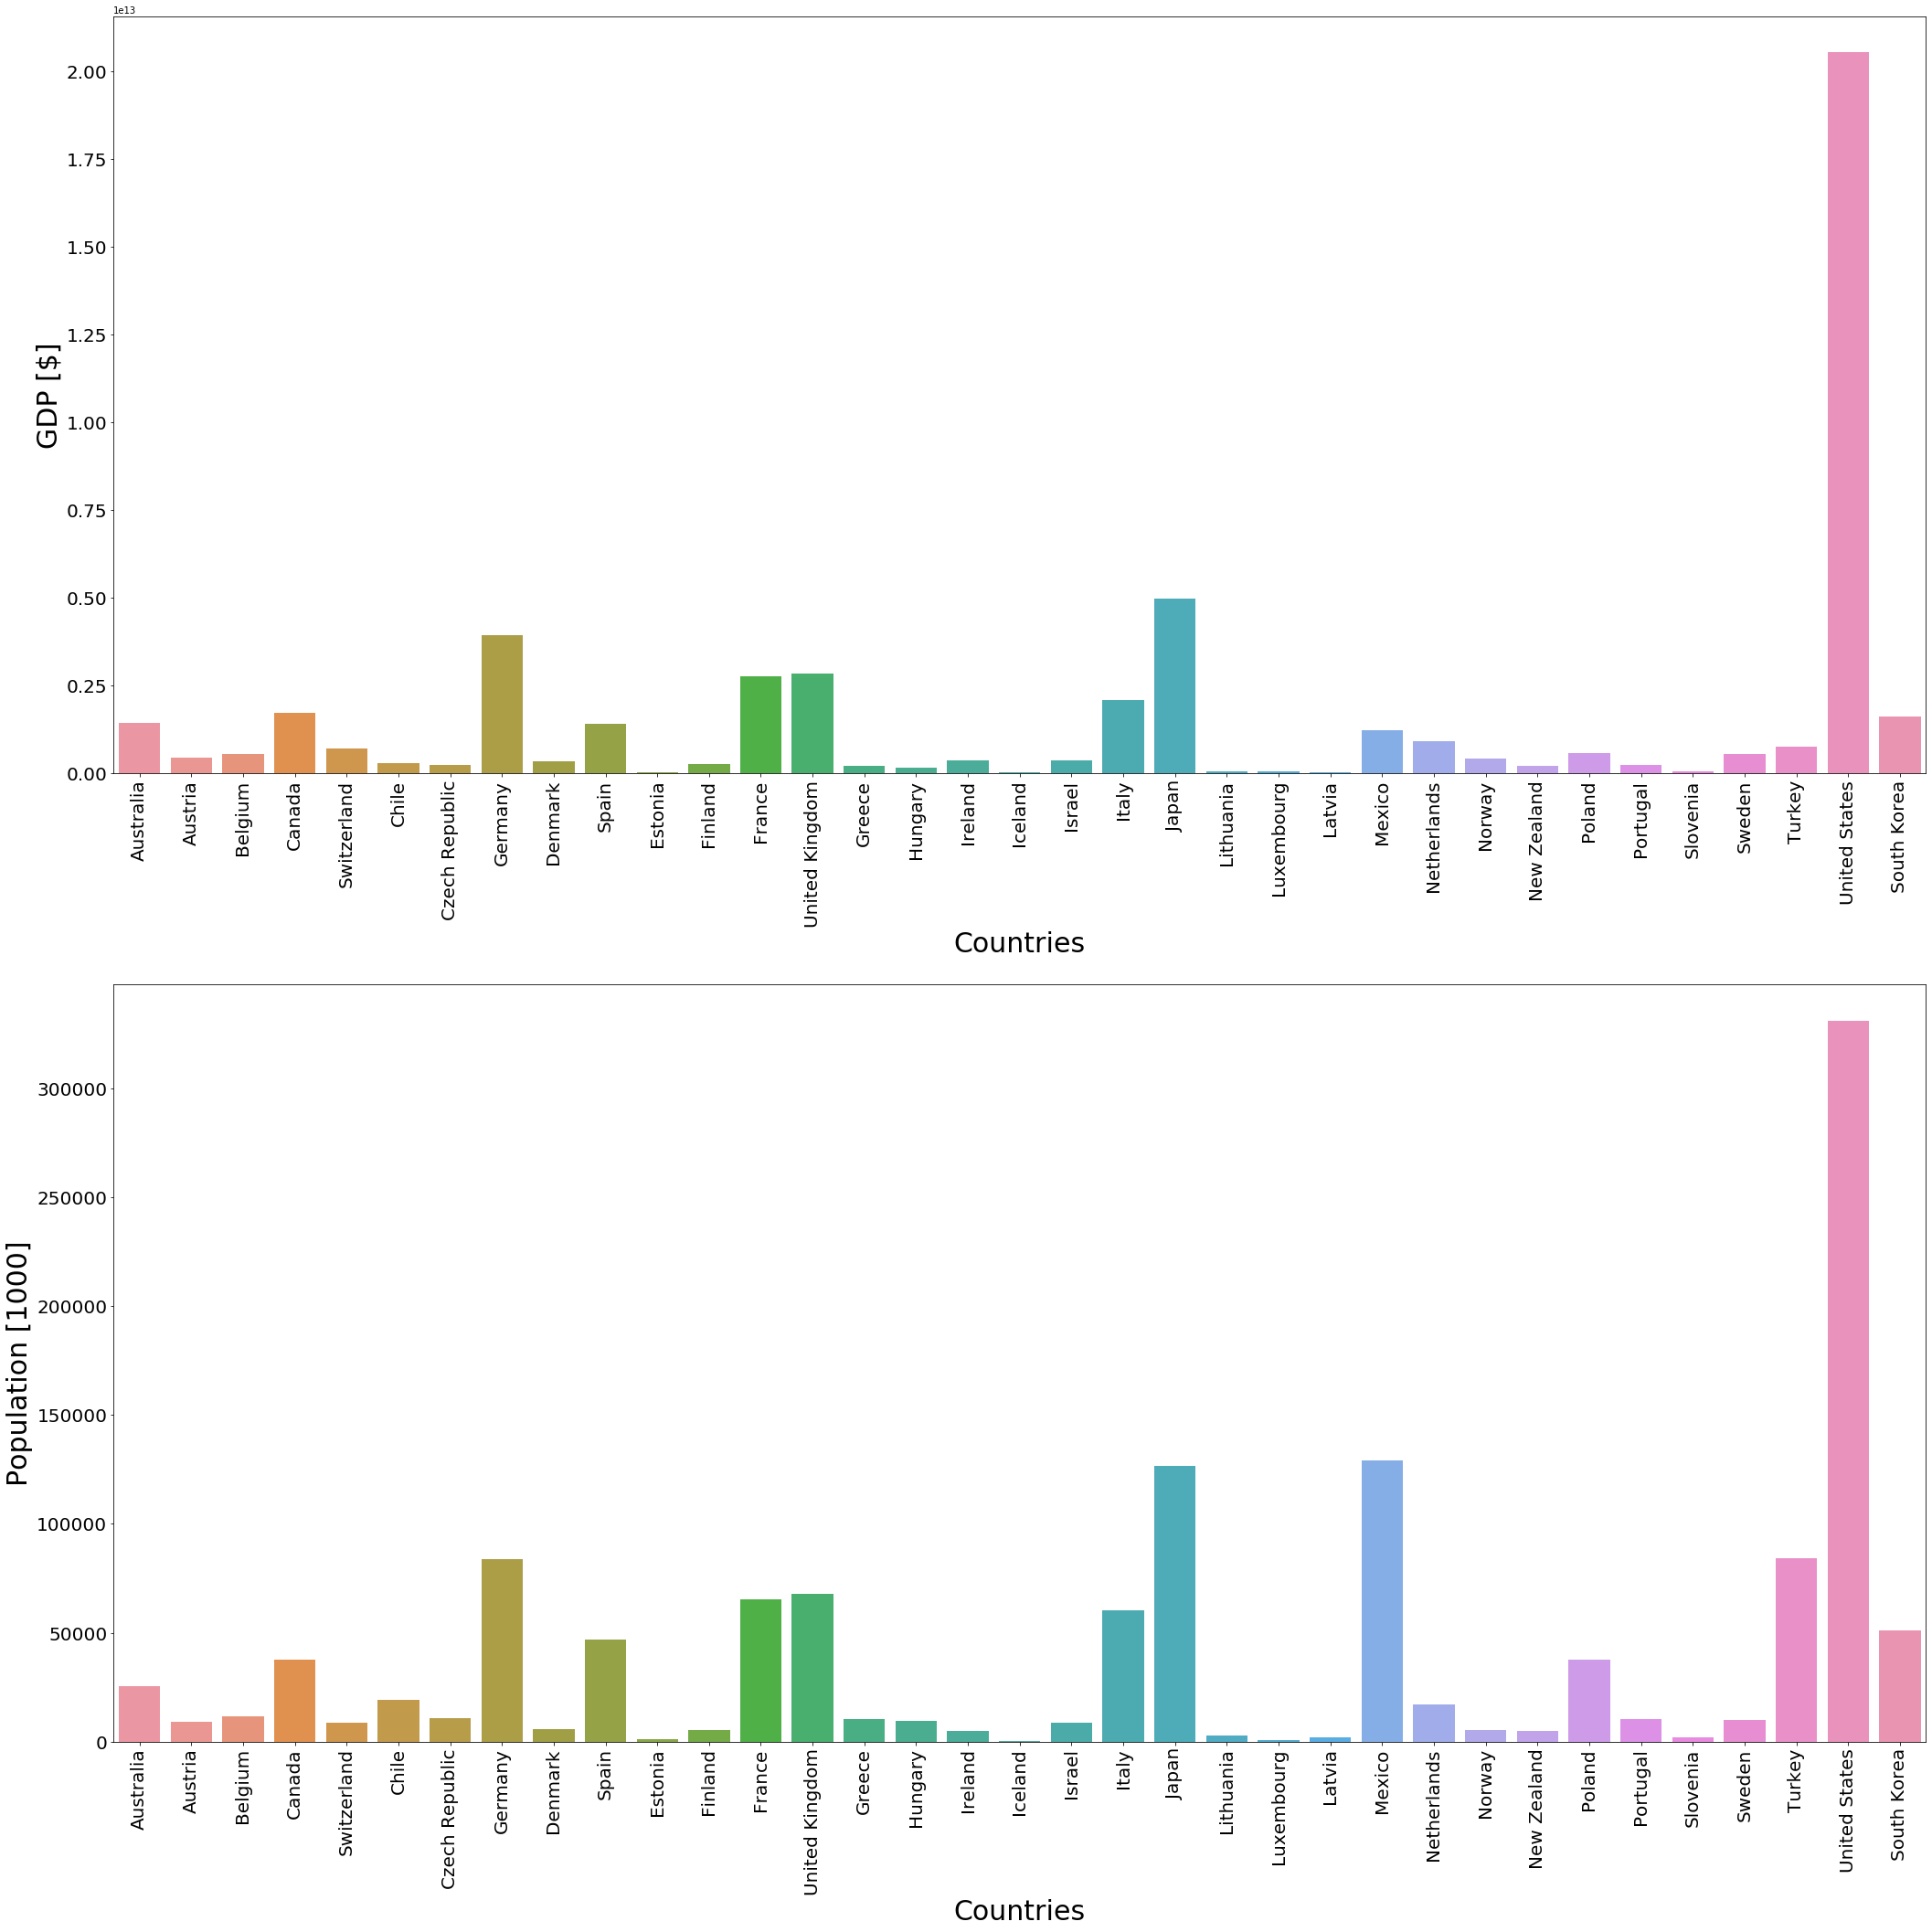

In [54]:
plt.figure(figsize=(30,30))
plt.subplot(2,1,1)
sns.barplot(x="Country Name", y="GDP 2018", data=df_gdp_pop)
plt.xticks(rotation="vertical", size=20)
plt.yticks(size=20)
plt.xlabel('Countries', size=30)
plt.ylabel('GDP [$]', size=30)
plt.subplot(2,1,2)
sns.barplot(x="Country Name", y="Population", data=df_gdp_pop)
plt.xticks(rotation="vertical", size=20)
plt.yticks(size=20)
plt.xlabel('Countries', size=30)
plt.ylabel('Population [1000]', size=30)
plt.tight_layout(pad=3.0)
plt.show()

In [55]:
df_gdp_pop["GDP per capita"] = df_gdp_pop["GDP 2018"]/df_gdp_pop["Population"]

Text(0, 0.5, 'GDP per capita')

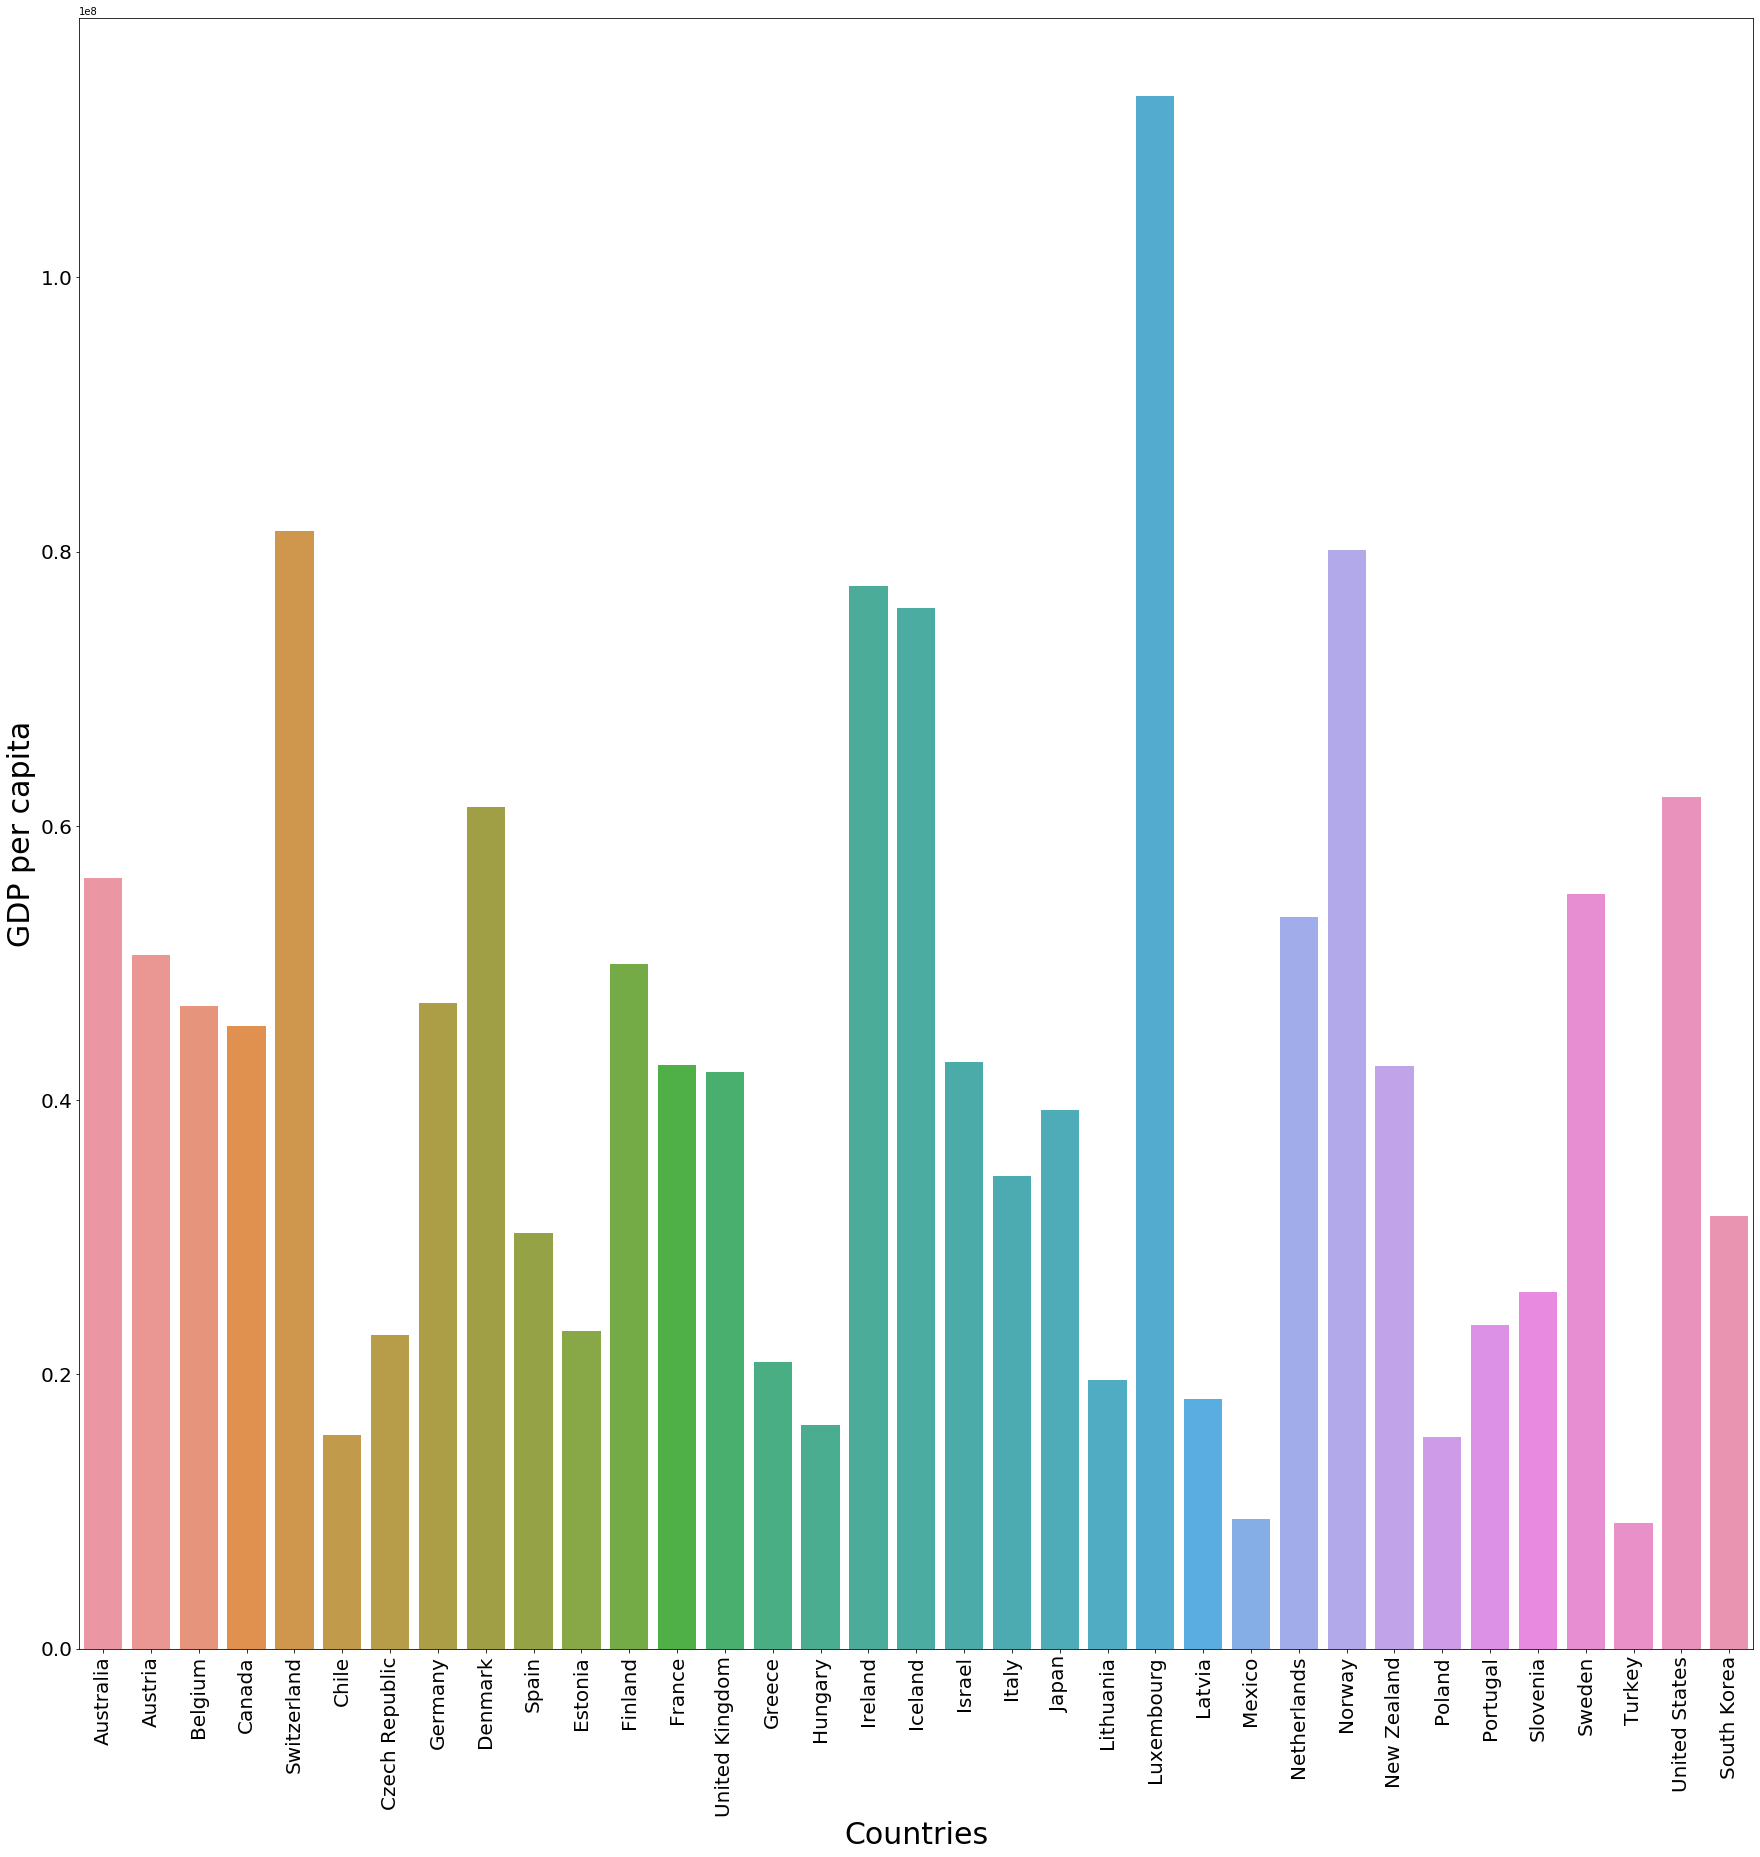

In [56]:
plt.figure(figsize=(30,30))
sns.barplot(x="Country Name", y="GDP per capita", data=df_gdp_pop)
plt.xticks(rotation="vertical", size=20)
plt.yticks(size=20)
plt.xlabel('Countries', size=30)
plt.ylabel('GDP per capita', size=30)

---

### 3) Daily Confirmed Cases

In [57]:
#Source : https://ourworldindata.org/grapher/daily-cases-covid-19
df_confirmed_cases = pd.read_csv("daily-cases-covid-19.csv")

In [58]:
df_confirmed_cases.tail(30)

Entity Code          Date  Daily confirmed cases (cases)
28319  Zimbabwe  ZWE  May 26, 2020                              0
28320  Zimbabwe  ZWE  May 27, 2020                              0
28321  Zimbabwe  ZWE  May 28, 2020                             76
28322  Zimbabwe  ZWE  May 29, 2020                             17
28323  Zimbabwe  ZWE  May 30, 2020                             11
28324  Zimbabwe  ZWE  May 31, 2020                             14
28325  Zimbabwe  ZWE   Jun 1, 2020                              4
28326  Zimbabwe  ZWE   Jun 2, 2020                             25
28327  Zimbabwe  ZWE   Jun 3, 2020                              3
28328  Zimbabwe  ZWE   Jun 4, 2020                             16
28329  Zimbabwe  ZWE   Jun 5, 2020                             15
28330  Zimbabwe  ZWE   Jun 6, 2020                             28
28331  Zimbabwe  ZWE   Jun 7, 2020                             14
28332  Zimbabwe  ZWE   Jun 8, 2020                              3
28333  Zimbabwe  ZWE   Jun 9, 2020                              5
28334  Zimbabwe  ZWE  Jun 10, 2020                             27
28335  Zimbabwe  ZWE  Jun 11, 2020                              6
28336  Zimbabwe  ZWE  Jun 12, 2020                             12
28337  Zimbabwe  ZWE  Jun 13, 2020                             11
28338  Zimbabwe  ZWE  Jun 14, 2020                             13
28339  Zimbabwe  ZWE  Jun 15, 2020                             27
28340  Zimbabwe  ZWE  Jun 16, 2020                              4
28341  Zimbabwe  ZWE  Jun 17, 2020                              7
28342  Zimbabwe  ZWE  Jun 18, 2020                              7
28343  Zimbabwe  ZWE  Jun 19, 2020                             62
28344  Zimbabwe  ZWE  Jun 20, 2020                             16
28345  Zimbabwe  ZWE  Jun 21, 2020                              7
28346  Zimbabwe  ZWE  Jun 22, 2020                              3
28347  Zimbabwe  ZWE  Jun 23, 2020                             23
28348  Zimbabwe  ZWE  Jun 24, 2020                             13

In [59]:
df_confirmed_cases = df_confirmed_cases.groupby(["Entity"]).sum()
df_confirmed_cases = df_confirmed_cases.rename(columns={"Daily confirmed cases (cases)":"Total confirmed cases"})
df_confirmed_cases.head()

Total confirmed cases
Entity                            
Afghanistan                  29481
Africa                      324392
Albania                       2047
Algeria                      12076
Andorra                        855

In [60]:
df_confirmed_cases.reset_index(inplace=True)

In [61]:
df_confirmed_cases[df_confirmed_cases["Entity"].isin(OECD)].reset_index(drop=True)

Entity  Total confirmed cases
0        Australia                   7492
1          Austria                  17351
2          Belgium                  60810
3           Canada                 101963
4            Chile                 250767
5   Czech Republic                  10650
6          Denmark                  12561
7          Estonia                   1982
8          Finland                   7155
9           France                 161267
10         Germany                 191449
11          Greece                   3302
12         Hungary                   4107
13         Iceland                   1824
14         Ireland                  25391
15          Israel                  21512
16           Italy                 238833
17           Japan                  18027
18          Latvia                   1111
19       Lithuania                   1803
20      Luxembourg                   4133
21          Mexico                 191410
22     Netherlands                  49722
23     New Zealand                   1166
24          Norway                   8751
25          Poland                  32527
26        Portugal                  39737
27        Slovenia                   1534
28     South Korea                  12535
29           Spain                 246752
30          Sweden                  60837
31     Switzerland                  31249
32          Turkey                 190165
33  United Kingdom                 306210
34   United States                2347022

---

### 4) total confirmed deaths

In [62]:
#source : https://ourworldindata.org/grapher/total-daily-covid-deaths
df_death_cases = pd.read_csv("total-daily-covid-deaths.csv")

In [63]:
df_death_cases.tail(10)

Entity Code          Date  Total confirmed deaths (deaths)  \
28339  Zimbabwe  ZWE  Jun 15, 2020                                4   
28340  Zimbabwe  ZWE  Jun 16, 2020                                4   
28341  Zimbabwe  ZWE  Jun 17, 2020                                4   
28342  Zimbabwe  ZWE  Jun 18, 2020                                4   
28343  Zimbabwe  ZWE  Jun 19, 2020                                4   
28344  Zimbabwe  ZWE  Jun 20, 2020                                4   
28345  Zimbabwe  ZWE  Jun 21, 2020                                6   
28346  Zimbabwe  ZWE  Jun 22, 2020                                6   
28347  Zimbabwe  ZWE  Jun 23, 2020                                6   
28348  Zimbabwe  ZWE  Jun 24, 2020                                6   

       Daily new confirmed deaths (deaths)  
28339                                    0  
28340                                    0  
28341                                    0  
28342                                    0  
28343                                    0  
28344                                    0  
28345                                    2  
28346                                    0  
28347                                    0  
28348                                    0

In [64]:
df_death_cases = df_death_cases.groupby(["Entity"]).sum()
df_death_cases.reset_index(inplace=True)
df_death_cases.head(30)

Entity  Total confirmed deaths (deaths)  \
0                       Afghanistan                            15889   
1                            Africa                           258810   
2                           Albania                             2644   
3                           Algeria                            43750   
4                           Andorra                             3653   
5                            Angola                              280   
6                          Anguilla                                0   
7               Antigua and Barbuda                              217   
8                         Argentina                            33456   
9                           Armenia                             8415   
10                            Aruba                              186   
11                             Asia                          2250817   
12                 Asia excl. China                          1733406   
13                        Australia                             7457   
14                          Austria                            47298   
15                       Azerbaijan                             4270   
16                          Bahamas                              833   
17                          Bahrain                             1481   
18                       Bangladesh                            38213   
19                         Barbados                              502   
20                          Belarus                            12993   
21                          Belgium                           631236   
22                           Belize                              155   
23                            Benin                              256   
24                          Bermuda                              578   
25                           Bhutan                                0   
26                          Bolivia                            19621   
27  Bonaire Sint Eustatius and Saba                                0   
28           Bosnia and Herzegovina                             8761   
29                         Botswana                               84   

    Daily new confirmed deaths (deaths)  
0                                   618  
1                                  8613  
2                                    45  
3                                   861  
4                                    52  
5                                    10  
6                                     0  
7                                     3  
8                                  1049  
9                                   386  
10                                    3  
11                                50104  
12                                45464  
13                                  102  
14                                  693  
15                                  167  
16                                   11  
17                                   67  
18                                 1545  
19                                    7  
20                                  357  
21                                 9713  
22                                    2  
23                                   13  
24                                    9  
25                                    0  
26                                  846  
27                                    0  
28                                  171  
29                                    1

In [65]:
df_death_cases = df_death_cases[df_death_cases["Entity"].isin(OECD)].reset_index(drop=True)
df_death_cases = df_death_cases.drop(["Total confirmed deaths (deaths)"], axis=1)
df_death_cases = df_death_cases.rename(columns = {"Daily new confirmed deaths (deaths)": "Total confirmed deaths"})
df_death_cases

Entity  Total confirmed deaths
0        Australia                     102
1          Austria                     693
2          Belgium                    9713
3           Canada                    8454
4            Chile                    4505
5   Czech Republic                     339
6          Denmark                     603
7          Estonia                      69
8          Finland                     327
9           France                   29720
10         Germany                    8914
11          Greece                     190
12         Hungary                     573
13         Iceland                      10
14         Ireland                    1720
15          Israel                     308
16           Italy                   34675
17           Japan                     963
18          Latvia                      30
19       Lithuania                      77
20      Luxembourg                     110
21          Mexico                   23377
22     Netherlands                    6095
23     New Zealand                      22
24          Norway                     248
25          Poland                    1375
26        Portugal                    1540
27        Slovenia                     111
28     South Korea                     281
29           Spain                   28325
30          Sweden                    5161
31     Switzerland                    1679
32          Turkey                    5001
33  United Kingdom                   42927
34   United States                  121228

----

### 5) Total Covid-19 tests

In [156]:
df_tests = pd.read_csv("full-list-total-tests-for-covid-19.csv")
df_tests.head()

Entity Code          Date  Total tests
0  Argentina  ARG   Apr 8, 2020        13330
1  Argentina  ARG   Apr 9, 2020        14850
2  Argentina  ARG  Apr 10, 2020        16379
3  Argentina  ARG  Apr 11, 2020        18027
4  Argentina  ARG  Apr 13, 2020        19758

In [133]:
df_tests = df_tests.groupby("Entity").max()
df_tests.reset_index(inplace=True)
df_tests.drop(columns=["Code", "Date"], inplace=True)
df_tests.head()

Entity  Total tests
0   Argentina       309601
1   Australia      2180424
2     Austria       584243
3     Bahrain       511458
4  Bangladesh       663444

In [155]:
df_tests = df_tests[df_tests["Entity"].isin(OECD)]
df_tests.head(30)

Entity  Total tests
1        Australia      2180424
2          Austria       584243
6          Belgium       905354
10          Canada      2558287
11           Chile      1025081
16  Czech Republic       532987
17         Denmark       960329
20         Estonia       104300
22         Finland       237875
24         Germany      5412655
27          Greece       291840
29         Hungary       258115
30         Iceland        63143
35         Ireland       404989
36          Israel       804739
37           Italy      5163154
39           Japan       435495
44          Latvia       142794
45       Lithuania       406557
46      Luxembourg       163090
49          Mexico       456138
53     Netherlands       561863
54     New Zealand       378257
56          Norway       300722
62          Poland      1356035
64        Portugal      1102066
75        Slovenia        96599
77     South Korea      1200233
78           Spain      3290388
79          Sweden       447462

#### Merge total cofirmed cases, total cofirmed deaths, and total tests

In [135]:
df_cases = pd.merge(right = df_death_cases, left= df_confirmed_cases, left_on='Entity', right_on='Entity')
df_cases = pd.merge(right = df_cases, left= df_tests, left_on='Entity', right_on='Entity')

---

#### Merge all dataframes (Population + GDP + Total Cases + Total deaths + Total tests)

In [144]:
df = pd.merge(right = df_gdp_pop, left= df_cases, left_on='Entity', right_on='Country Name')
df = df.drop(["Country Name", "GDP per capita"], axis=1).rename(columns={"Entity":"Country Name"})

---

### Correlation

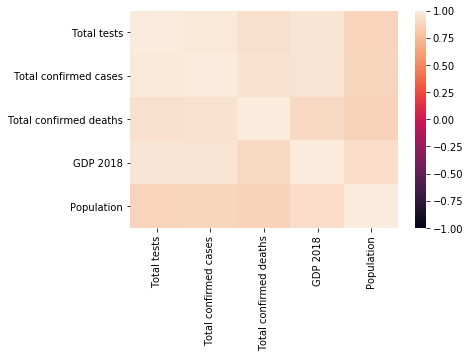

In [146]:
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            )

In [147]:
correlation = df.corr()
correlation

Total tests  Total confirmed cases  \
Total tests                1.000000               0.982848   
Total confirmed cases      0.982848               1.000000   
Total confirmed deaths     0.941342               0.949440   
GDP 2018                   0.963951               0.956201   
Population                 0.878735               0.883376   

                        Total confirmed deaths  GDP 2018  Population  
Total tests                           0.941342  0.963951    0.878735  
Total confirmed cases                 0.949440  0.956201    0.883376  
Total confirmed deaths                1.000000  0.902928    0.868347  
GDP 2018                              0.902928  1.000000    0.928982  
Population                            0.868347  0.928982    1.000000

Since the features are very correleated with each other, we will use a smaller range for the correlation in order to spot the big differences in the plot (I set Vmin=0.8 instead of -1)

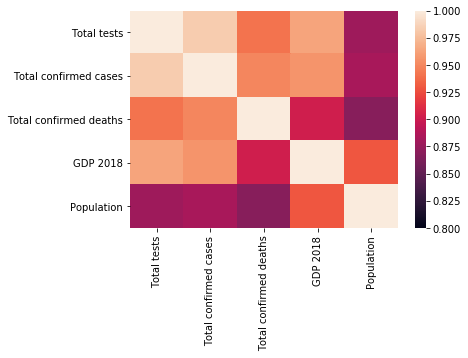

In [148]:
sns.heatmap(df.corr(),
            vmin=0.8,
            vmax=1,
            )

In [154]:
df

Country Name  Total tests  Total confirmed cases  \
0        Australia      2180424                   7492   
1          Austria       584243                  17351   
2          Belgium       905354                  60810   
3           Canada      2558287                 101963   
4            Chile      1025081                 250767   
5   Czech Republic       532987                  10650   
6          Denmark       960329                  12561   
7          Estonia       104300                   1982   
8          Finland       237875                   7155   
9          Germany      5412655                 191449   
10          Greece       291840                   3302   
11         Hungary       258115                   4107   
12         Iceland        63143                   1824   
13         Ireland       404989                  25391   
14          Israel       804739                  21512   
15           Italy      5163154                 238833   
16           Japan       435495                  18027   
17          Latvia       142794                   1111   
18       Lithuania       406557                   1803   
19      Luxembourg       163090                   4133   
20          Mexico       456138                 191410   
21     Netherlands       561863                  49722   
22     New Zealand       378257                   1166   
23          Norway       300722                   8751   
24          Poland      1356035                  32527   
25        Portugal      1102066                  39737   
26        Slovenia        96599                   1534   
27     South Korea      1200233                  12535   
28           Spain      3290388                 246752   
29          Sweden       447462                  60837   
30     Switzerland       534490                  31249   
31          Turkey      3135424                 190165   
32  United Kingdom      4537055                 306210   
33   United States     29207820                2347022   

    Total confirmed deaths      GDP 2018  Population  
0                      102  1.433904e+12     25500.0  
1                      693  4.552858e+11      9006.0  
2                     9713  5.427611e+11     11590.0  
3                     8454  1.713342e+12     37742.0  
4                     4505  2.982311e+11     19116.0  
5                      339  2.452259e+11     10709.0  
6                      603  3.556753e+11      5792.0  
7                       69  3.073214e+10      1327.0  
8                      327  2.767431e+11      5541.0  
9                     8914  3.947620e+12     83784.0  
10                     190  2.180318e+11     10423.0  
11                     573  1.578829e+11      9660.0  
12                      10  2.587848e+10       341.0  
13                    1720  3.824875e+11      4938.0  
14                     308  3.705880e+11      8656.0  
15                   34675  2.083864e+12     60462.0  
16                     963  4.971323e+12    126476.0  
17                      30  3.440923e+10      1886.0  
18                      77  5.342907e+10      2722.0  
19                     110  7.088533e+10       626.0  
20                   23377  1.220699e+12    128933.0  
21                    6095  9.136585e+11     17135.0  
22                      22  2.049239e+11      4822.0  
23                     248  4.341666e+11      5421.0  
24                    1375  5.856638e+11     37847.0  
25                    1540  2.406745e+11     10197.0  
26                     111  5.400797e+10      2079.0  
27                     281  1.619000e+12     51269.0  
28                   28325  1.419042e+12     46755.0  
29                    5161  5.560865e+11     10099.0  
30                    1679  7.051404e+11      8655.0  
31                    5001  7.713503e+11     84339.0  
32                   42927  2.855297e+12     67886.0  
33                  121228  2.054434e+13    331003.0

In [143]:
df.to_csv('/Users/haniawattar/Desktop/group19/data/cleaned data/df_oecd.csv', sep=',')